**Group Members**

1. Srun Sompoppokasest

2. Wanit Siripattanadilok

3. Canate Prakobkaew (Dew)

# **Load Dependencies**

In [3]:
!pip install pycaret

     |████████████████████████████████| 266 kB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 52.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 59.5 MB/s 
     |████████████████████████████████| 111 kB 76.9 MB/s 
     |████████████████████████████████| 6.8 MB 25.5 MB/s 
     |████████████████████████████████| 167 kB 64.7 MB/s 
     |████████████████████████████████| 1.3 MB 58.9 MB/s 
     |████████████████████████████████| 80 kB 12.0 MB/s 
     |████████████████████████████████| 248 kB 61.3 MB/s 
     |████████████████████████████████| 14.6 MB 29.1 MB/s 
     |████████████████████████████████| 271 kB 64.6 MB/s 
     |████████████████████████████████| 56 kB 6.3 MB/s 
     |████████████████████████████████| 3.1 MB 32.1 MB/s 
     |████████████████████████████████| 675 kB 64.7 MB/s 
     |█████

In [4]:
import pandas as pd
from pycaret.clustering import *

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [104]:
df = pd.read_csv('Supermarket Data.csv')

In [105]:
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,20071005,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,20071010,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,20071209,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,20070929,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02
4,200737,20071110,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 956574 non-null  int64  
 1   SHOP_DATE                 956574 non-null  int64  
 2   SHOP_WEEKDAY              956574 non-null  int64  
 3   SHOP_HOUR                 956574 non-null  int64  
 4   QUANTITY                  956574 non-null  int64  
 5   SPEND                     956574 non-null  float64
 6   PROD_CODE                 956574 non-null  object 
 7   PROD_CODE_10              956574 non-null  object 
 8   PROD_CODE_20              956574 non-null  object 
 9   PROD_CODE_30              956574 non-null  object 
 10  PROD_CODE_40              956574 non-null  object 
 11  CUST_CODE                 802892 non-null  object 
 12  CUST_PRICE_SENSITIVITY    802892 non-null  object 
 13  CUST_LIFESTAGE            697259 non-null  o

In [107]:
df.describe()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,BASKET_ID
count,956574.000000,9.565740e+05,956574.000000,956574.000000,956574.000000,956574.000000,9.565740e+05
mean,200702.251671,2.006970e+07,3.996021,14.950665,1.514577,1.871697,9.941059e+14
std,65.857803,7.160957e+03,1.997058,3.636119,1.621021,2.767820,3.332150e+09
min,200607.000000,2.006041e+07,1.000000,8.000000,1.000000,0.010000,9.941001e+14
25%,200637.000000,2.006111e+07,2.000000,12.000000,1.000000,0.750000,9.941031e+14
50%,200713.000000,2.007052e+07,4.000000,15.000000,1.000000,1.200000,9.941059e+14
75%,200742.000000,2.007121e+07,6.000000,18.000000,1.000000,2.060000,9.941088e+14
max,200819.000000,2.008071e+07,7.000000,21.000000,129.000000,476.160000,9.941117e+14


In [108]:
df.isnull().sum()

SHOP_WEEK                        0
SHOP_DATE                        0
SHOP_WEEKDAY                     0
SHOP_HOUR                        0
QUANTITY                         0
SPEND                            0
PROD_CODE                        0
PROD_CODE_10                     0
PROD_CODE_20                     0
PROD_CODE_30                     0
PROD_CODE_40                     0
CUST_CODE                   153682
CUST_PRICE_SENSITIVITY      153682
CUST_LIFESTAGE              259315
BASKET_ID                        0
BASKET_SIZE                      0
BASKET_PRICE_SENSITIVITY         0
BASKET_TYPE                      0
BASKET_DOMINANT_MISSION          0
STORE_CODE                       0
STORE_FORMAT                     0
STORE_REGION                     0
dtype: int64

In [109]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [110]:
df.tail(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
956569,200617,2006-06-22,5,12,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994101100088778,M,MM,Top Up,Fresh,STORE00002,LS,W01
956570,200633,2006-10-13,6,20,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102700099738,L,LA,Top Up,Fresh,STORE00002,LS,W01
956571,200617,2006-06-22,5,18,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000544241,LA,YA,994101100506174,L,LA,Top Up,Fresh,STORE00002,LS,W01
956572,200619,2006-07-06,5,19,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000423155,LA,YF,994101300433650,L,LA,Full Shop,Fresh,STORE00002,LS,W01
956573,200635,2006-10-23,2,21,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102900104676,L,MM,Top Up,Fresh,STORE00002,LS,W01


# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs

Time betweeness

Variety of product

Variety of Cat

Shop hour

is_weekend


# Calculate features

In [126]:
#flag shop time
df_basket = df[['CUST_CODE','BASKET_ID','SHOP_HOUR','SHOP_WEEKDAY','SHOP_DATE','PROD_CODE','PROD_CODE_10']].groupby(by=['CUST_CODE','BASKET_ID']).agg(hour=('SHOP_HOUR','max'),
                                                                                                                                       weekday=('SHOP_WEEKDAY','max'),
                                                                                                                                       date=('SHOP_DATE','max'),
                                                                                                                                       item=('PROD_CODE','nunique'),
                                                                                                                                       cat=('PROD_CODE_10','nunique')
                                                                                                                                        ).reset_index()

df_basket['flag_5to10'] = [1 if x in [5,6,7,8,9,10] else 0 for x in df_basket['hour']]
df_basket['flag_11to16'] = [1 if x in [11,12,13,14,15,16] else 0 for x in df_basket['hour']]
df_basket['flag_17to21'] = [1 if x in [17,18,19,20,21] else 0 for x in df_basket['hour']]
df_basket['flag_22to4'] = [1 if x in [22,23,24,0,1,2,3,4] else 0 for x in df_basket['hour']]
df_basket['flag_weekday'] = [1 if x not in [6,7] else 0 for x in df_basket['weekday']]
df_basket['flag_weekend'] = [1 if x in [6,7] else 0 for x in df_basket['weekday']]
df_basket['count_tx'] = 1
# df_basket

In [127]:
cus_basket = df_basket.drop(columns=['BASKET_ID','hour','weekday','item','cat'])
cus_basket = cus_basket.groupby(by=['CUST_CODE']).agg('sum').reset_index()
attr_list = ['flag_5to10','flag_11to16','flag_17to21','flag_22to4','flag_weekday','flag_weekend']
for attr in attr_list:
    cus_basket[attr] = cus_basket[attr]/cus_basket['count_tx']
cus_basket = cus_basket.drop(columns=['count_tx'])
cus_basket

,CUST_CODE,flag_5to10,flag_11to16,flag_17to21,flag_22to4,flag_weekday,flag_weekend
0,CUST0000000181,0.000000,1.000000,0.000000,0.0,0.000000,1.000000
1,CUST0000000369,0.013636,0.609091,0.377273,0.0,0.727273,0.272727
2,CUST0000000689,0.187500,0.062500,0.750000,0.0,0.812500,0.187500
3,CUST0000000998,0.666667,0.333333,0.000000,0.0,0.666667,0.333333
4,CUST0000001163,0.000000,1.000000,0.000000,0.0,0.750000,0.250000
...,...,...,...,...,...,...,...
6095,CUST0000999593,0.066667,0.800000,0.133333,0.0,0.766667,0.233333
6096,CUST0000999645,0.000000,0.090909,0.909091,0.0,0.727273,0.272727
6097,CUST0000999654,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
6098,CUST0000999935,0.000000,0.714286,0.285714,0.0,0.761905,0.238095


In [128]:
def time_between_date(_list):
  time_list = list()
  for i in range(len(_list) - 1):
    date_diff = (_list[i+1] - _list[i]).days
    time_list.append(date_diff)
  if len(time_list) > 0:
    avg_time_btw = sum(time_list)/ len(time_list)
  else:
    avg_time_btw = 0
  return avg_time_btw

In [129]:
df_copy = df_basket.copy()
df_test = df_copy.groupby(by=['CUST_CODE']).agg({'date': set})
df_test['date'] = df_test['date'].apply(lambda x: sorted(list(x)))
df_test['time_btwn'] = df_test['date'].apply(lambda x: time_between_date(x))
df_test=df_test.reset_index()
df_test = df_test.drop(columns=['date'])

In [130]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  ).reset_index()

In [131]:
df_csv = df_csv.merge(cus_basket,how='left',on='CUST_CODE')
df_csv = df_csv.merge(df_test,how='left',on='CUST_CODE')

In [132]:
df_csv

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,flag_5to10,flag_11to16,flag_17to21,flag_22to4,flag_weekday,flag_weekend,time_btwn
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
1,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,0.013636,0.609091,0.377273,0.0,0.727273,0.272727,4.246073
2,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,0.187500,0.062500,0.750000,0.0,0.812500,0.187500,22.466667
3,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,0.666667,0.333333,0.000000,0.0,0.666667,0.333333,32.000000
4,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,0.000000,1.000000,0.000000,0.0,0.750000,0.250000,203.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,CUST0000999593,453.58,30,206,2006-05-06,2008-04-02,0.066667,0.800000,0.133333,0.0,0.766667,0.233333,24.034483
6096,CUST0000999645,105.11,11,46,2006-04-30,2008-05-08,0.000000,0.090909,0.909091,0.0,0.727273,0.272727,73.900000
6097,CUST0000999654,5.86,1,4,2006-06-25,2006-06-25,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000
6098,CUST0000999935,444.17,21,127,2006-11-29,2008-06-05,0.000000,0.714286,0.285714,0.0,0.761905,0.238095,29.157895


In [133]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [134]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [135]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [136]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [137]:
df_csv.head(5)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,flag_5to10,flag_11to16,flag_17to21,flag_22to4,flag_weekday,flag_weekend,time_btwn,TicketSize,total_days,recency
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,2.440000,1,547
1,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,0.013636,0.609091,0.377273,0.0,0.727273,0.272727,4.246073,4.360591,812,1
2,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,0.187500,0.062500,0.750000,0.0,0.812500,0.187500,22.466667,20.535625,338,13
3,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,0.666667,0.333333,0.000000,0.0,0.666667,0.333333,32.000000,1.983333,65,730
4,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,0.000000,1.000000,0.000000,0.0,0.750000,0.250000,203.000000,9.935000,610,14


# **Cluster customers**

In [138]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)

,Description,Value
0,session_id,6846
1,Original Data,"(6100, 16)"
2,Missing Values,False
3,Numeric Features,13
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(6100, 13)"
9,CPU Jobs,-1


In [139]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [43]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7fe90e7dc4d0>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7fe90e7...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7fe90e7dc830>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7fe90ec92560>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7fe90ec92320>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7fe90ec925f0>,make_scorer(completeness_score),pred,{},True,True,False


# Compare model performance

In [44]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0944,31.9214,5.4216,0,0,0


In [45]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.315400,68.697600,0.744400,0,0,0
ap,0.252500,201.644100,1.130900,0,0,0
kmeans,0.248500,362.448500,1.401000,0,0,0
hclust,0.202300,282.064900,1.558900,0,0,0
birch,0.184900,174.105900,1.382100,0,0,0
dbscan,-0.061000,60.401700,0.987100,0,0,0
kmodes,-0.094400,31.921400,5.421600,0,0,0


# Spectral Clustering Clustering

In [52]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3154,68.6976,0.7444,0,0,0


In [53]:
plot_model(sc)

# KMeans Clustering

In [140]:
kmeans = create_model('kmeans',num_clusters= 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2989,1560.2918,1.1296,0,0,0


In [141]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=6846, tol=0.0001, verbose=0)


In [142]:
plot_model(kmeans)

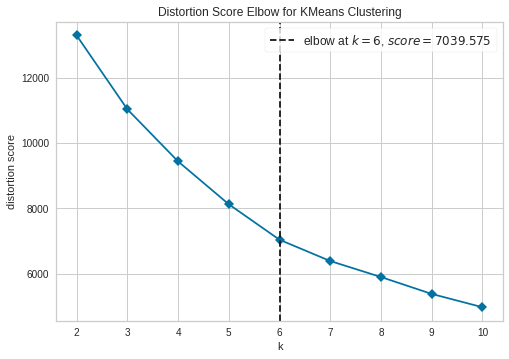

In [82]:
plot_model(kmeans, plot = 'elbow')

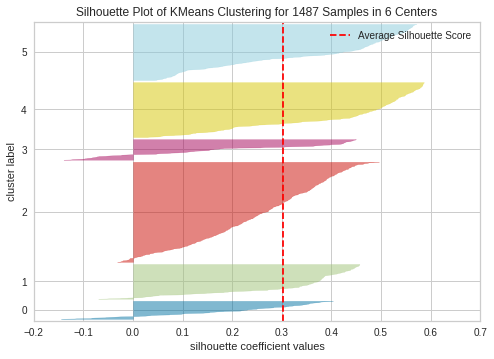

In [83]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**

In [143]:
kmeans_df = assign_model(kmeans)
# kmeans_df

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,flag_5to10,flag_11to16,flag_17to21,flag_22to4,flag_weekday,flag_weekend,time_btwn,TicketSize,total_days,recency,Cluster
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,2.440000,1,547,Cluster 5
1,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,0.013636,0.609091,0.377273,0.0,0.727273,0.272727,4.246073,4.360591,812,1,Cluster 3
2,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,0.187500,0.062500,0.750000,0.0,0.812500,0.187500,22.466667,20.535625,338,13,Cluster 0
3,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,0.666667,0.333333,0.000000,0.0,0.666667,0.333333,32.000000,1.983333,65,730,Cluster 2
4,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,0.000000,1.000000,0.000000,0.0,0.750000,0.250000,203.000000,9.935000,610,14,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,CUST0000999593,453.58,30,206,2006-05-06,2008-04-02,0.066667,0.800000,0.133333,0.0,0.766667,0.233333,24.034483,15.119333,698,95,Cluster 1
6096,CUST0000999645,105.11,11,46,2006-04-30,2008-05-08,0.000000,0.090909,0.909091,0.0,0.727273,0.272727,73.900000,9.555455,740,59,Cluster 1
6097,CUST0000999654,5.86,1,4,2006-06-25,2006-06-25,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,5.860000,1,742,Cluster 4
6098,CUST0000999935,444.17,21,127,2006-11-29,2008-06-05,0.000000,0.714286,0.285714,0.0,0.761905,0.238095,29.157895,21.150952,555,31,Cluster 1


In [144]:
final_df= kmeans_df.drop(columns=['CUST_CODE','FirstDate','LastDate'])
member_df = final_df[['Cluster']]
member_df['member_count'] = 1
member_df = member_df.groupby(by=['Cluster']).agg('sum').reset_index()
final_df = final_df.groupby(by=['Cluster']).agg('mean').reset_index()
final_df = final_df.merge(member_df,how='left',on='Cluster')
import seaborn as sns
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
s = final_df.style.background_gradient(cmap=cm)
s

,Cluster,TotalSpend,TotalVisits,TotalSKUs,flag_5to10,flag_11to16,flag_17to21,flag_22to4,flag_weekday,flag_weekend,time_btwn,TicketSize,total_days,recency,member_count
0,Cluster 0,24.559311,2.348889,10.332222,0.008202,0.061780,0.930019,0.000000,0.913611,0.086389,48.659831,9.930286,92.343333,372.537778,900
1,Cluster 1,202.769570,20.089873,56.342616,0.117525,0.569059,0.313417,0.000000,0.704929,0.295071,122.028285,11.295317,610.313924,64.115612,2370
2,Cluster 2,17.383856,3.138739,6.553153,0.831572,0.121383,0.047045,0.000000,0.868670,0.131330,101.090488,5.522025,170.167568,325.331532,555
3,Cluster 3,2377.180914,166.903704,354.474074,0.145906,0.534554,0.319540,0.000000,0.713439,0.286561,7.081116,17.878389,790.316049,5.827160,405
4,Cluster 4,14.443351,1.747748,7.007207,0.010948,0.967095,0.021957,0.000000,0.944126,0.055874,23.503771,8.438913,41.749550,436.735135,1110
5,Cluster 5,12.800000,1.543421,6.222368,0.114803,0.544053,0.341144,0.000000,0.066353,0.933647,26.353638,8.253614,42.688158,431.307895,760


Cluster 0 = "DarkDay Dead Dreamer"
Cluster 1 = "Midday Middle Majority"
Cluster 2 = "e
Clsuter 3 = 